In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [3]:
with pd.HDFStore("./data/train.h5", "r") as train:
    df = train.get("train")

Notes:
    1. fundamental_ feautures have a lot more NaNs
    2. Observing the NaN count per indictor, does appear that there are groupings that we can extract. The indicators my be a function of the same underlying.

In [4]:
df.head(3)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940


In [5]:
df.shape

(1710756, 111)

In [6]:
columns = [print(col) for col in df.columns]

id
timestamp
derived_0
derived_1
derived_2
derived_3
derived_4
fundamental_0
fundamental_1
fundamental_2
fundamental_3
fundamental_5
fundamental_6
fundamental_7
fundamental_8
fundamental_9
fundamental_10
fundamental_11
fundamental_12
fundamental_13
fundamental_14
fundamental_15
fundamental_16
fundamental_17
fundamental_18
fundamental_19
fundamental_20
fundamental_21
fundamental_22
fundamental_23
fundamental_24
fundamental_25
fundamental_26
fundamental_27
fundamental_28
fundamental_29
fundamental_30
fundamental_31
fundamental_32
fundamental_33
fundamental_34
fundamental_35
fundamental_36
fundamental_37
fundamental_38
fundamental_39
fundamental_40
fundamental_41
fundamental_42
fundamental_43
fundamental_44
fundamental_45
fundamental_46
fundamental_47
fundamental_48
fundamental_49
fundamental_50
fundamental_51
fundamental_52
fundamental_53
fundamental_54
fundamental_55
fundamental_56
fundamental_57
fundamental_58
fundamental_59
fundamental_60
fundamental_61
fundamental_62
fundamental_63
t

Columns
1. id
1. timestamp
1. derived_[0..4]
1. fundamental_[0..63]
1. technical_[0..44]
1. y

In [18]:
df.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1.710756e+06,1.710756e+06,1.637797e+06,1.629727e+06,1.312105e+06,1.561285e+06,1.304298e+06,1.686809e+06,1.031686e+06,1.341916e+06,...,1.708204e+06,1.691591e+06,1.691591e+06,1.690740e+06,1.708520e+06,1.666567e+06,1.690755e+06,1.706070e+06,1.473977e+06,1.710756e+06
mean,1.093858e+03,9.456257e+02,-4.537569e+00,7.729437e+11,-3.321289e-01,-5.047151e-01,1.803233e+01,-2.041142e-02,-5.703752e+08,-1.623607e-01,...,-8.584284e-02,-9.108464e-02,-8.161018e-02,-7.290059e-02,4.907529e-02,5.236320e-03,-1.700147e-02,-9.735643e-01,3.881556e-04,2.217474e-04
std,6.308563e+02,5.195685e+02,2.497790e+02,7.620848e+13,6.521051e+01,1.020845e+02,9.260062e+02,2.496619e-01,7.502489e+10,3.675968e+00,...,6.129349e-01,2.476959e-01,2.333819e-01,2.230485e-01,3.105295e-01,1.134394e-01,2.121332e-01,9.626583e-01,3.013458e-02,2.242171e-02
min,0.000000e+00,0.000000e+00,-2.017497e+04,-7.375435e-02,-9.848880e+03,-3.434176e+04,-8.551914e+03,-2.344957e+00,-1.043737e+13,-1.077101e+03,...,-1.687572e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-5.250904e-01,-4.449529e-01,-1.000000e+00,-2.000000e+00,-1.265686e-01,-8.609413e-02
25%,5.500000e+02,5.040000e+02,-1.449710e-01,-2.956479e-02,-5.967524e-02,-1.655826e-01,-1.057050e-01,-1.996543e-01,-1.960470e-01,-2.280967e-01,...,-4.050297e-01,-4.651562e-04,-1.992532e-04,-2.203252e-05,-1.521701e-01,-7.377038e-02,-3.887695e-15,-2.000000e+00,-1.998819e-02,-9.561389e-03
50%,1.098000e+03,9.560000e+02,-8.368272e-04,5.523058e-03,2.109505e-02,2.475614e-03,1.175234e-02,-4.064488e-02,-7.395084e-03,-3.029069e-02,...,-8.502064e-02,-3.951567e-12,-1.418487e-13,-1.591224e-16,-1.476793e-02,9.782702e-05,0.000000e+00,-6.597540e-01,1.117279e-05,-1.570681e-04
75%,1.657000e+03,1.401000e+03,1.199108e-01,1.078554e-01,1.952209e-01,3.037236e-01,1.556464e-01,1.303819e-01,1.832071e-01,1.764751e-01,...,1.909600e-01,-5.219879e-40,0.000000e+00,0.000000e+00,1.772415e-01,7.855728e-02,0.000000e+00,-5.188884e-08,2.047074e-02,9.520990e-03
max,2.158000e+03,1.812000e+03,3.252527e+03,1.068448e+16,3.823001e+03,1.239737e+03,6.785965e+04,1.378195e+00,5.203165e+02,7.677125e+01,...,4.957758e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.569265e+00,6.844833e-01,1.000000e+00,0.000000e+00,1.435858e-01,9.349781e-02


### Assess present of NaNs

Assess NaNs across col

In [21]:
col_nan = len(df.columns[df.isnull().any()])
print("Number of columns with NaN values in train: {}/{}".format(col_nan, df.shape[1]))

Number of columns with NaN values in train: 106/111


In [22]:
col_nan = df.isnull().sum(axis=0)
col_nan.head(30)

id                     0
timestamp              0
derived_0          72959
derived_1          81029
derived_2         398651
derived_3         149471
derived_4         406458
fundamental_0      23947
fundamental_1     679070
fundamental_2     368840
fundamental_3     454380
fundamental_5     962020
fundamental_6     701625
fundamental_7      26340
fundamental_8     373166
fundamental_9     565567
fundamental_10    112977
fundamental_11    368840
fundamental_12    110871
fundamental_13    355138
fundamental_14    356084
fundamental_15    354897
fundamental_16    355138
fundamental_17     97222
fundamental_18     15833
fundamental_19     54588
fundamental_20    110871
fundamental_21     54333
fundamental_22    558488
fundamental_23    356723
dtype: int64

In [26]:
ncount_sorted = df.count().sort_values()
ncount_sorted

fundamental_5      748736
fundamental_38     907267
fundamental_6     1009131
fundamental_1     1031686
fundamental_61    1038955
fundamental_28    1043425
fundamental_26    1053572
fundamental_57    1053572
fundamental_24    1134101
fundamental_9     1145189
fundamental_22    1152268
fundamental_49    1152423
fundamental_31    1256376
fundamental_3     1256376
fundamental_51    1263703
fundamental_47    1264428
fundamental_34    1275894
fundamental_35    1286280
derived_4         1304298
derived_2         1312105
fundamental_54    1326543
fundamental_39    1333182
fundamental_63    1335142
fundamental_8     1337590
fundamental_11    1341916
fundamental_2     1341916
fundamental_56    1341916
fundamental_55    1341916
fundamental_23    1354033
fundamental_14    1354672
                   ...   
technical_38      1691591
technical_0       1691591
fundamental_59    1694694
fundamental_45    1694694
fundamental_36    1694913
fundamental_48    1694913
fundamental_18    1694923
technical_33

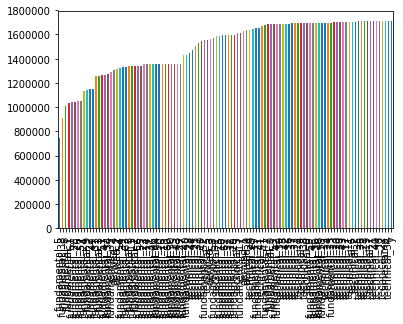

In [31]:
ncount_sorted.plot.bar()

In [32]:
miss = df.isnull().mean()
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

technical_21      0.001307
technical_40      0.001307
technical_7       0.001307
technical_19      0.001356
technical_27      0.001415
technical_36      0.001492
technical_35      0.001844
technical_2       0.002501
technical_11      0.002501
technical_6       0.002501
technical_17      0.002501
technical_43      0.002739
technical_20      0.002785
technical_13      0.002785
technical_30      0.002785
fundamental_33    0.008087
technical_14      0.008291
technical_33      0.008496
fundamental_18    0.009255
fundamental_36    0.009261
fundamental_48    0.009261
fundamental_45    0.009389
fundamental_59    0.009389
technical_37      0.011203
technical_32      0.011203
technical_12      0.011203
technical_0       0.011203
technical_9       0.011203
technical_38      0.011203
technical_16      0.011680
                    ...   
fundamental_14    0.208144
fundamental_23    0.208518
fundamental_2     0.215601
fundamental_55    0.215601
fundamental_56    0.215601
fundamental_11    0.215601
f

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


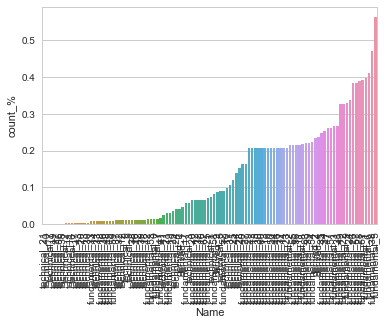

In [34]:
# Visualize missing values
miss_df = miss.to_frame()
miss_df.columns = ['count_%']
miss_df.index_names = ['Name']
miss_df['Name'] = miss_df.index

# Plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count_%', data=miss_df)
plt.xticks(rotation = 90)
plt.show()

The fundamental features have a material # of Nans.

In [69]:
# Feautures with more than 20% of nan values.
df_large_nan_count = miss_df[miss_df["count_%"] > 0.20]
print(df_large_nan_count.head(10))
print("Number of features with nan frequency > 20%: {}".format(df_large_nan_count.count()[0]))

                 count_%            Name
fundamental_29  0.206988  fundamental_29
fundamental_43  0.207236  fundamental_43
fundamental_15  0.207450  fundamental_15
fundamental_30  0.207456  fundamental_30
fundamental_60  0.207584  fundamental_60
fundamental_13  0.207591  fundamental_13
fundamental_16  0.207591  fundamental_16
fundamental_50  0.207646  fundamental_50
fundamental_44  0.207981  fundamental_44
fundamental_46  0.208003  fundamental_46
Number of features with nan frequency > 20%: 41


Assess NaNs across rows

In [11]:
nan_rows = df.isnull().sum(axis=1)

In [18]:
nan_rows.head(20)

0     24
1     22
2     28
3     38
4     21
5     30
6     60
7     22
8     21
9     27
10    27
11    42
12    21
13    51
14    54
15    33
16    26
17    27
18    36
19    30
dtype: int64

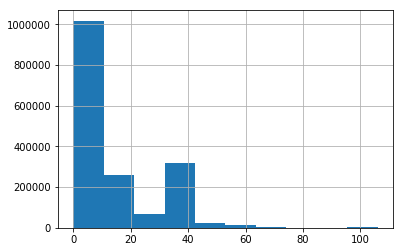

In [19]:
nan_rows.hist()

In [20]:
cat = df.select_dtypes(include=['object']).columns
num = df.select_dtypes(exclude=['object']).columns
print("Numerical features: {}".format(len(num)))
print("Categorical features: {}".format(len(cat)))

Numerical features: 111
Categorical features: 0
